In [ ]:
# imports
import pandas as pd
import numpy as np

from plotnine import ggplot, aes, geom_bar, facet_wrap, labs, theme_bw
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/DiscoBallData.xlsx - section2.csv")

data.head()

# drop columns
data.drop(['Timestamp'], axis=1, inplace=True)

In [ ]:
data.head(50)

,What is your primary learning style?,Whatâ€™s your primary superpower?,What is your current occupation?,What is your level of exposure to adversity?,What sounds like your ideal way to spend your free time?,How diverse is your food palette?,Where do you grow up?,Are you more of an introvert or an extrovert?,What's your favorite genre for movies/books,How would you describe your fashion style?,...,How do you react when getting praise/compliments in public?,How often do you interact with people who are different from you?,How direct or open are you in your communication?,Which type of organizational environment do you most thrive in?,How do you react to feedback from others?,"In the moment that I disagree with someoneâ€™s opinion, I am most likely to",I would describe my primary expression of patience as:,My public speaking skills are:,Unnamed: 30,Participant ID
0,3,1,1,2,1,1,3,3,1,2,...,1,3,3,3,3,2,3,2,4,1
1,2,5,4,3,4,3,2,3,2,1,...,4,4,4,4,3,3,1,1,3,2
2,3,5,1,3,1,2,2,2,1,1,...,2,4,2,2,3,3,4,2,2,3
3,3,3,1,4,5,2,4,3,4,1,...,3,3,4,3,3,1,1,2,3,4
4,3,2,4,3,3,3,3,3,2,1,...,1,4,3,3,3,2,1,2,3,5
5,1,1,1,3,1,3,3,2,3,1,...,2,4,3,3,3,3,4,2,1,6
6,4,1,1,3,4,3,2,1,1,1,...,1,4,3,3,3,3,1,2,2,7
7,1,2,1,3,3,3,3,2,4,2,...,2,4,3,2,3,2,1,3,1,8
8,1,3,1,2,4,2,3,1,3,1,...,2,2,3,3,3,1,3,3,2,9
9,1,4,4,3,4,2,4,1,4,1,...,2,4,2,2,2,4,1,3,2,10


In [ ]:
# Assuming each row is a participant and each column represents an answer (with values between 1-5)
num_participants = data.shape[0]
matches = np.zeros((num_participants, num_participants))  # 2D matrix for storing the match counts

# Iterate over every pair of participants to compare their answers
for i in range(num_participants):
    for j in range(num_participants):
        if i != j:  # We don't want to compare the same person
            # Compare the answers of participant i and participant j
            matches[i][j] = (data.iloc[i] == data.iloc[j]).sum()  # Count the number of matching answers

# Convert the matrix to a DataFrame for easier handling
matches_df = pd.DataFrame(matches, index=data.index, columns=data.index)

# Display the match matrix
print(matches_df)

      0     1     2     3     4     5     6     7     8     9   ...    11  \
0    0.0   6.0  10.0  10.0  14.0  13.0  13.0  13.0  12.0   1.0  ...  12.0   
1    6.0   0.0  13.0  10.0  15.0  10.0  12.0   8.0   3.0   8.0  ...  11.0   
2   10.0  13.0   0.0  10.0  10.0  16.0  16.0  11.0  10.0  14.0  ...   9.0   
3   10.0  10.0  10.0   0.0  10.0   8.0   9.0   9.0  10.0   5.0  ...   9.0   
4   14.0  15.0  10.0  10.0   0.0  15.0  16.0  15.0  10.0   8.0  ...   9.0   
5   13.0  10.0  16.0   8.0  15.0   0.0  16.0  17.0  13.0   7.0  ...  13.0   
6   13.0  12.0  16.0   9.0  16.0  16.0   0.0  11.0  15.0  12.0  ...  14.0   
7   13.0   8.0  11.0   9.0  15.0  17.0  11.0   0.0  12.0  11.0  ...  15.0   
8   12.0   3.0  10.0  10.0  10.0  13.0  15.0  12.0   0.0  13.0  ...  13.0   
9    1.0   8.0  14.0   5.0   8.0   7.0  12.0  11.0  13.0   0.0  ...   9.0   
10  14.0   6.0  13.0  10.0  14.0  16.0  15.0  15.0  14.0   7.0  ...  14.0   
11  12.0  11.0   9.0   9.0   9.0  13.0  14.0  15.0  13.0   9.0  ...   0.0   

Index(['level_0',   'index',         0,         1,         2,         3,
               4,         5,         6,         7,         8,         9,
              10,        11,        12,        13,        14,        15,
              16,        17,        18,        19,        20],
      dtype='object')
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20],
      dtype='object')


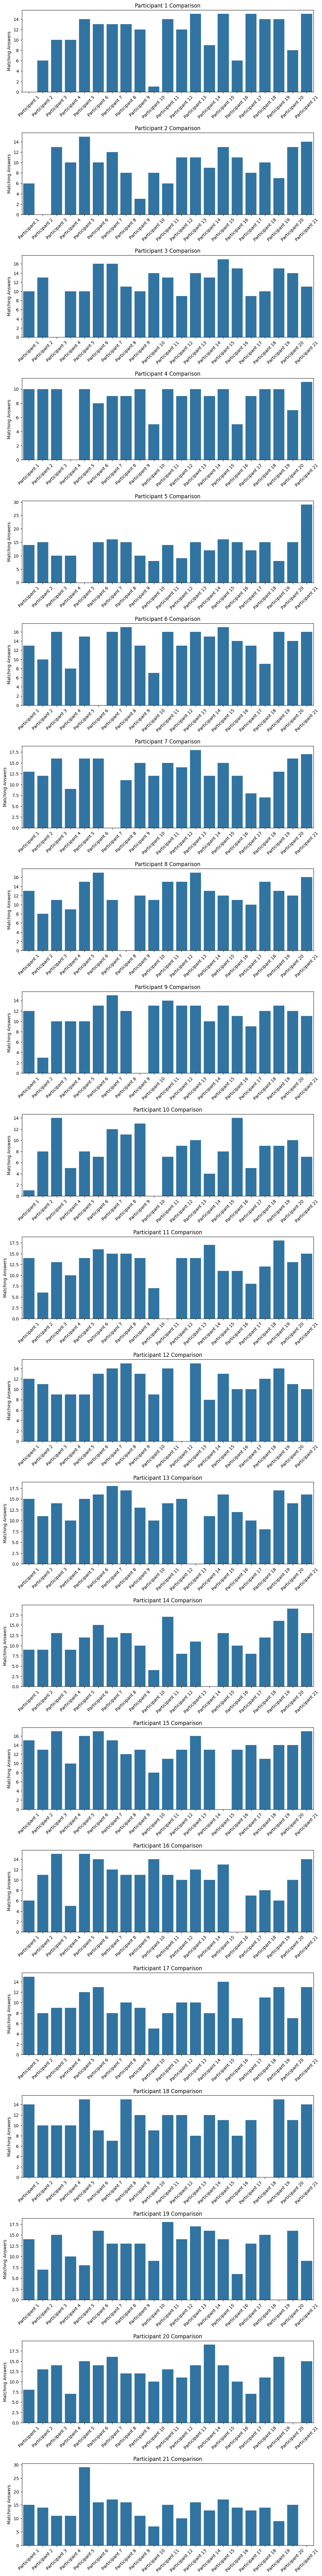

In [ ]:
# Check the columns to identify unnecessary ones
print(matches_df.columns)

# Remove 'level_0' and 'index' if they are still present in the DataFrame
matches_df_clean = matches_df.drop(columns=['level_0', 'index'], errors='ignore')

# Ensure the column names are cleaned up for plotting
print(matches_df_clean.columns)

# Assuming matches_df_clean is your cleaned DataFrame
num_participants = matches_df_clean.shape[0]

# Adjust the x-axis labels (the columns) to start from Participant 1 instead of 0
participant_labels = [f'Participant {i+1}' for i in range(num_participants)]

# Create a figure with n subplots (one for each participant) without shared x-axis
fig, axes = plt.subplots(num_participants, 1, figsize=(12, num_participants * 5))

# Loop over each participant and create a bar plot
for i in range(num_participants):
    # Exclude self-comparison by setting the value for matches[i][i] to NaN or ignoring it
    matches_to_plot = matches_df_clean.iloc[i].copy()
    matches_to_plot[i] = None  # Exclude self-comparison by setting it to None or NaN

    # Create barplot for each participant
    sns.barplot(
        x=participant_labels,  # Adjusted x-axis labels (Participant 1, 2, ..., 21)
        y=matches_to_plot,     # Matching answers for participant i
        ax=axes[i]             # Assign each plot to its respective axis
    )
    # Adjust the title to reflect the new participant numbering (1-based index)
    axes[i].set_title(f'Participant {i+1} Comparison')  # Add 1 to the participant index for display
    axes[i].set_ylabel('Matching Answers')              # Y-axis label

    # Rotate the x-axis labels by 45 degrees for each subplot
    axes[i].tick_params(axis='x', rotation=45)

    # Set x-axis label only if it's the last plot to avoid redundancy
    #axes[i].set_xlabel('Other Participants')

# Adjust the space between the subplots with subplots_adjust
plt.subplots_adjust(hspace=0.5)  # hspace controls the vertical spacing between plots

# Display the plot
plt.show()